# Proyek Analisis Data: E-Commerce Dataset
- Nama: Vania Zerlina Utami
- Email: vania130903zerlina@gmail.com
- Id Dicoding: vaniazerlina

## Menentukan Pertanyaan Bisnis

- pertanyaan 1
    Customer wilayah mana yang banyak dan paling sedikit melakukan pemesanan hingga tahap penerimaan produk?
- pertanyaan 2
    Produk dengan kategori apa yang banyak dijual oleh seller dan dipesan oleh customer?
- pertanyaan 3
    Bagaimana grafik jumlah penjualan barang per tahun?
- Pertanyaan 4
    Seller mana yang aktif melakukan penjualan dan seller mana yang sering mengcancel penjualan?
- Pertanyaan 5
    Bagaimana jumlah score review untuk setiap produk? 
- Pertanyaan 6
    Berapa jumlah pelanggan yang pernah melakukan pemesanan dan yang belum pernah melakukan pemesanan?
- Pertanyaan 7
    Bagaimana skoring RFM pelanggan berdasarkan data pemesanan?
- Pertanyaan 8  
    Bagaimana rata-rata skor ulasan untuk setiap produk?
- Pertanyaan 9     
    Di mana pelanggan berada berdasarkan lokasi geografis?
- Pertanyaan 10    
    Apa metode pembayaran yang paling umum digunakan oleh pelanggan?


## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from tabulate import tabulate

## Data Wrangling

### Gathering Data

In [2]:
cust_df = pd.read_csv ('customers_dataset.csv', delimiter = ',')
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geo_df = pd.read_csv ('geolocation_dataset.csv', delimiter = ',')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv ('order_items_dataset.csv', delimiter = ',')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv ('order_payments_dataset.csv', delimiter = ',')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv ('order_reviews_dataset.csv', delimiter = ',')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv ('orders_dataset.csv', delimiter = ',')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv ('product_category_name_translation.csv', delimiter = ',')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv ('products_dataset.csv', delimiter = ',')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv ('sellers_dataset.csv', delimiter = ',')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Tabel Customers

In [11]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
cust_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
cust_df.duplicated().sum()

0

In [14]:
cust_df.customer_city.value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

In [15]:
cust_df.customer_state.value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

Terdapat sebanyak 99441 customer yang mendaftarkan diri sebagai pengguna e-commerce ini, dan paling banyak berasal dari kota sao paulo dan state sao paulo, pengguna terdikit terdapat di state Roraima

#### Tabel Geolocation

In [16]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
geo_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
geo_df.duplicated().sum()

261831

In [19]:
geo_df.geolocation_city.value_counts()

sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: geolocation_city, Length: 8011, dtype: int64

In [20]:
geo_df.geolocation_state.value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

Pada tabel geolocation terdapat data duplicate sebanyak 261831. Jika dinilai dari informasi data, geolocation merupakan daerah yang terdaftar dalam e-commerce yang dihubungkan melalui zip untuk customers dan juga sellers

##### Tabel order_items

In [21]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
order_items_df.duplicated().sum()

0

In [23]:
order_items_df.price.value_counts()

59.90      2481
69.90      1987
49.90      1953
89.90      1548
99.90      1432
           ... 
1369.90       1
108.24        1
1224.99       1
24.52         1
736.00        1
Name: price, Length: 5968, dtype: int64

In [24]:
order_items_df.freight_value.value_counts()

15.10    3707
7.78     2262
14.10    1875
11.85    1846
18.23    1575
         ... 
57.83       1
80.47       1
70.92       1
42.85       1
6.37        1
Name: freight_value, Length: 6999, dtype: int64

#### Tabel order_payments

In [25]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
order_payments_df.duplicated().sum()

0

In [28]:
order_payments_df.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

#### Tabel order_reviews

In [29]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [30]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [31]:
order_reviews_df.duplicated().sum()

0

In [32]:
order_reviews_df.review_score.value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

Pada tabel reviews, terdapat banyak data kosong yang jumlahnya melebihi 3/4 dari jumlah keseluruhan data. Namun, kolom tersebut sudah diwakili oleh kolom ratings yang tidak mempunyai nilai kosong.

#### Tabel Orders

In [33]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [34]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Pada tabel ini kita tidak bisa menghapus atau mengisi nilai null, karena bisa jadi dalam data ini ada nilai null karena product yang sudah di pesan belum diapproved, belum dikirim dan belum diterima oleh konsumen.

In [35]:
orders_df.duplicated().sum()

0

In [36]:
orders_df.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Namun, kita bisa menghapus product yang statusnya di canceled karena berarti produk tersebut tidak jadi dipesan oleh konsumen.

#### Tabel Products Category

In [37]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [38]:
product_category_df.duplicated().sum()

0

In [39]:
product_category_df.product_category_name_english.value_counts()

health_beauty                1
food                         1
fashion_sport                1
fashion_underwear_beach      1
construction_tools_safety    1
                            ..
luggage_accessories          1
cool_stuff                   1
fashion_shoes                1
audio                        1
security_and_services        1
Name: product_category_name_english, Length: 71, dtype: int64

#### Tabel Products

In [40]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [41]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [42]:
products_df.duplicated().sum()

0

In [43]:
products_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

#### Tabel Sellers

In [44]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [45]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [46]:
sellers_df.duplicated().sum()

0

In [47]:
sellers_df.seller_city.value_counts()

sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: seller_city, Length: 611, dtype: int64

In [48]:
sellers_df.seller_state.value_counts()

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: seller_state, dtype: int64

### Cleaning Data

#### Tabel Geolocation

###### Drop data duplikat

In [49]:
geo_df.duplicated().sum()

261831

In [50]:
geo_df.drop_duplicates(inplace=True)

In [51]:
print("Jumlah duplikasi: ", geo_df.duplicated().sum())

Jumlah duplikasi:  0


In [52]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


Membersihkan data duplicate pada tabel geolocation karena duplicate dapat mempengaruhi analisis data nantinya

#### Tabel Order Payments

##### Imputation data

In [53]:
order_payments_df.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [54]:
not_defined_payments = order_payments_df[order_payments_df['payment_type'] == 'not_defined']
print(not_defined_payments)

                               order_id  payment_sequential payment_type  \
51280  4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411  00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
94427  c8c528189310eaa44a745b8d9d26908b                   1  not_defined   

       payment_installments  payment_value  
51280                     1            0.0  
57411                     1            0.0  
94427                     1            0.0  


In [55]:
# Menampilkan DataFrame yang hanya berisi baris dengan nilai 'payment_value' 0.00
filtered = order_payments_df[order_payments_df['payment_value'] == 0.00]

# Mengurutkan DataFrame yang sudah difilter
sorted_df = filtered.sort_values(by='payment_value')

# Mencetak DataFrame yang sudah diurutkan
print(sorted_df)

                                order_id  payment_sequential payment_type  \
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
51280   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411   00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
94427   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   

        payment_installments  payment_value  
19922                      1            0.0  
36822                      1            0.0  
43744                      1            0.0  
51280                      1            0.0  

Jika dilihat, tipe payments yang not defined secara keseluruhan payment valuenya adalah 0.00, dimana untuk 0.00 payment type nya adalah voucher, sehingga kita akan mengisikan not defined menjadi voucher. Namun jika jumlah data not defined terlalu banyak, metode ini akan beresiko. Tetapi karna pada data ini not defined berjumlah 3 dari 103886 data, maka akan kita gunakan.

In [56]:
# Mengganti nilai 'not_defined' menjadi 'voucher' dalam kolom 'payment_type'
order_payments_df['payment_type'] = order_payments_df['payment_type'].replace('not_defined', 'voucher')

In [57]:
order_payments_df.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5778
debit_card      1529
Name: payment_type, dtype: int64

not_defined berhasil di konversi ke voucher, sehingga dalam value_counts sudah tidak ada lagi nilai not_defined

#### Tabel orders

##### Drop Data

In [58]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [59]:
orders_df.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [60]:
# Mendrop baris dengan nilai 'canceled' dan 'unavailable' pada kolom 'order_status'
orders2_df = orders_df[(orders_df['order_status'] != 'canceled') & (orders_df['order_status'] != 'unavailable')]

# Mencetak DataFrame setelah mendrop nilai 'canceled' dan 'unavailable'
print(orders2_df)


                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0      

In [61]:
orders2_df.order_status.value_counts()

delivered     96478
shipped        1107
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64

DIbuatkan variabel baru untuk menampung data yang berstatus canceled dan unvailable yang berhasil dihapus, jadi produk yang ada pada tabel orders adalah produk yang benar-benar dipesan oleh pelanggan tanpa adanya pembatalan. Namun, data yang berisikan data awal masih tetap disimpan dalam variabel orders_df 

#### Tabel Products

##### Drop Data

In [62]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [63]:
# Mendrop baris yang mengandung nilai kosong tanpa membuat variabel baru
products_df.dropna(inplace=True)

# Mencetak DataFrame setelah mendrop nilai kosong
print(products_df)

                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product

In [64]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Menghapus data product yang belum lengkap, karena dinilai product tersebut tidak memiliki nama product atau product belum dipublikasikan sehingga datanya masih belum lengkap

## Exploratory Data Analysis (EDA)

#### Penggabungan tabel orders, item orders, dan customers

In [65]:
# Langkah 1: Gabungkan tabel orders2_df dan order_items_df berdasarkan order_id
merged_oitems_df = orders2_df.join(order_items_df.set_index('order_id'), on='order_id', how='left')

# Langkah 2: Gabungkan hasilnya dengan tabel cust_df berdasarkan customer_id
result1_df = merged_oitems_df.join(cust_df.set_index('customer_id'), on='customer_id', how='left')

result1_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [66]:
result1_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  20
order_delivered_carrier_date      728
order_delivered_customer_date    1920
order_estimated_delivery_date       0
order_item_id                       8
product_id                          8
seller_id                           8
shipping_limit_date                 8
price                               8
freight_value                       8
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [67]:
# Group by customer_state dan menghitung beberapa metrik
result1_df.groupby(by="customer_state").agg({
    "order_id": "nunique",  # Jumlah order unik
    "price": ["sum", "min", "max"]  # Nilai minimum, maksimum, dan jumlah price
})


order_id       price                
                nunique         sum    min      max
customer_state                                     
AC                   81    15982.95  12.90  1200.00
AL                  411    80314.81   9.00  1798.00
AM                  147    22356.84   8.50  1688.00
AP                   68    13474.30  13.65  1437.00
BA                 3344   507108.83   5.20  2999.89
CE                 1323   226264.06   7.80  2690.00
DF                 2121   300886.45   4.90  3999.00
ES                 2018   273532.13   5.99  6729.00
GO                 1998   287870.46   3.90  2740.00
MA                  736   119291.62   6.99  2499.75
MG                11496  1573508.20   3.85  4099.99
MS                  708   116754.65   6.10  6735.00
MT                  902   156313.53   6.90  1890.00
PA                  969   178821.12   4.99  3980.00
PB                  531   114874.10   4.90  4590.00
PE                 1643   261739.94   5.99  3700.00
PI                  490    86660.09  12.50  1780.00
PR                 4983   676883.06   2.90  2999.99
RJ                12698  1811623.42   0.85  4799.00
RN                  482    83034.98  10.00  1788.00
RO                  246    46031.64   9.99  2400.00
RR                   45     7739.44  13.65   949.90
RS                 5417   742559.78   3.06  3124.00
SC                 3600   518578.28   3.90  3109.99
SE                  345    58920.85  13.65  1670.00
SP                41127  5163867.22   0.85  6499.00
TO                  278    49407.99   8.50  2649.99

#### Penggabungan tabel orders dan product category

In [68]:
# 1. Menggabungkan orders2_df dan order_items_df berdasarkan order_id
merged_oitems_df = orders2_df.join(order_items_df.set_index('order_id'), on='order_id', how='left')

# 2. Menggabungkan order_items_df dengan products_df berdasarkan product_id
merged_products_df = merged_oitems_df.join(products_df.set_index('product_id'), on='product_id', how='left')

# 3. Menggabungkan hasilnya dengan product_category_df berdasarkan product_category_name
final_df = merged_products_df.join(product_category_df.set_index('product_category_name'), on='product_category_name', how='left')

# Cetak hasil
final_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,1.0,060cb19345d90064d1015407193c233d,...,27.36,automotivo,49.0,608.0,1.0,7150.0,65.0,10.0,65.0,auto
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1.0,a1804276d9941ac0733cfd409f5206eb,...,16.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1.0,4520766ec412348b8d4caa5e8a18c464,...,15.17,automotivo,59.0,956.0,1.0,50.0,16.0,16.0,17.0,auto
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,1.0,ac1789e492dcd698c5c10b97a671243a,...,16.05,moveis_decoracao,41.0,432.0,2.0,300.0,35.0,35.0,15.0,furniture_decor
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,1.0,9a78fb9862b10749a117f7fc3c31f051,...,19.77,moveis_escritorio,45.0,527.0,1.0,9750.0,42.0,41.0,42.0,office_furniture


In [69]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112109 entries, 0 to 99440
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112109 non-null  object 
 1   customer_id                    112109 non-null  object 
 2   order_status                   112109 non-null  object 
 3   order_purchase_timestamp       112109 non-null  object 
 4   order_approved_at              112089 non-null  object 
 5   order_delivered_carrier_date   111381 non-null  object 
 6   order_delivered_customer_date  110189 non-null  object 
 7   order_estimated_delivery_date  112109 non-null  object 
 8   order_item_id                  112101 non-null  float64
 9   product_id                     112101 non-null  object 
 10  seller_id                      112101 non-null  object 
 11  shipping_limit_date            112101 non-null  object 
 12  price                          

In [70]:
# Group by order_id dan product_category_name_english, menghitung jumlah produk
result2_df = final_df.groupby(['product_category_name_english']).agg({
    'order_id': 'count',        # Jumlah produk
    'price': 'sum',             # Jumlah total harga
    'freight_value': 'sum'      # Jumlah total biaya pengiriman
}).reset_index()

# Cetak hasil dalam bentuk tabel
table1 = tabulate(result2_df, headers='keys', tablefmt='pretty', showindex=False)

# Tampilkan tabel
print(table1)

+-----------------------------------------+----------+--------------------+--------------------+
|      product_category_name_english      | order_id |       price        |   freight_value    |
+-----------------------------------------+----------+--------------------+--------------------+
|       agro_industry_and_commerce        |   212    |      72530.47      |       5843.6       |
|            air_conditioning             |   295    | 54723.159999999996 |      6713.41       |
|                   art                   |   208    |      24167.64      |      4028.57       |
|          arts_and_craftmanship          |    24    |      1814.01       |       370.13       |
|                  audio                  |   363    |      50668.6       |      5702.66       |
|                  auto                   |   4204   |     586585.73      |      92020.91      |
|                  baby                   |   3042   |      408378.2      |      67980.8       |
|             bed_bath_table  

#### Tabel orders_df dengan kolom order_purchase_timestamp dan order_status

In [71]:
# Konversi kolom order_purchase_timestamp menjadi tipe data datetime menggunakan assign
orders_df = orders_df.assign(order_purchase_timestamp=pd.to_datetime(orders_df['order_purchase_timestamp']))

# Ambil bulan dan tahun dari kolom order_purchase_timestamp menggunakan apply dan lambda
orders_df['month_year'] = orders_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y-%m'))

# Mengelompokkan data berdasarkan bulan, tahun, dan order_status
monthly_sales = orders_df.pivot_table(index=['month_year', 'order_status'], aggfunc='size').reset_index(name='total_sales')

# Cetak hasil dalam bentuk tabel
table2 = tabulate(monthly_sales, headers='keys', tablefmt='pretty', showindex=False)

# Tampilkan tabel
print(table2)

+------------+--------------+-------------+
| month_year | order_status | total_sales |
+------------+--------------+-------------+
|  2016-09   |   canceled   |      2      |
|  2016-09   |  delivered   |      1      |
|  2016-09   |   shipped    |      1      |
|  2016-10   |   canceled   |     24      |
|  2016-10   |  delivered   |     265     |
|  2016-10   |   invoiced   |     18      |
|  2016-10   |  processing  |      2      |
|  2016-10   |   shipped    |      8      |
|  2016-10   | unavailable  |      7      |
|  2016-12   |  delivered   |      1      |
|  2017-01   |   canceled   |      3      |
|  2017-01   |  delivered   |     750     |
|  2017-01   |   invoiced   |     12      |
|  2017-01   |  processing  |      9      |
|  2017-01   |   shipped    |     16      |
|  2017-01   | unavailable  |     10      |
|  2017-02   |   approved   |      1      |
|  2017-02   |   canceled   |     17      |
|  2017-02   |  delivered   |    1653     |
|  2017-02   |   invoiced   |   

In [72]:
# Mengelompokkan data berdasarkan bulan, tahun, dan order_status
monthly_sales = orders_df.groupby(['month_year', 'order_status']).size().reset_index(name='total_sales')

# Cetak hasil dalam bentuk tabel
table2 = tabulate(monthly_sales, headers='keys', tablefmt='pretty', showindex=False)

# Tampilkan tabel
print(table2)

+------------+--------------+-------------+
| month_year | order_status | total_sales |
+------------+--------------+-------------+
|  2016-09   |   canceled   |      2      |
|  2016-09   |  delivered   |      1      |
|  2016-09   |   shipped    |      1      |
|  2016-10   |   canceled   |     24      |
|  2016-10   |  delivered   |     265     |
|  2016-10   |   invoiced   |     18      |
|  2016-10   |  processing  |      2      |
|  2016-10   |   shipped    |      8      |
|  2016-10   | unavailable  |      7      |
|  2016-12   |  delivered   |      1      |
|  2017-01   |   canceled   |      3      |
|  2017-01   |  delivered   |     750     |
|  2017-01   |   invoiced   |     12      |
|  2017-01   |  processing  |      9      |
|  2017-01   |   shipped    |     16      |
|  2017-01   | unavailable  |     10      |
|  2017-02   |   approved   |      1      |
|  2017-02   |   canceled   |     17      |
|  2017-02   |  delivered   |    1653     |
|  2017-02   |   invoiced   |   

#### Tabel orders_df, order_items_df, dan sellers_df

In [73]:
# 1. Gabungkan DataFrame menggunakan join
merged_sellers_df = orders_df.join(order_items_df.set_index('order_id'), on='order_id', how='inner')\
                             .join(sellers_df.set_index('seller_id'), on='seller_id', how='inner')

# 2. Filter data
active_sellers = merged_sellers_df[~merged_sellers_df['order_status'].isin(['unavailable', 'canceled'])]
canceled_sellers = merged_sellers_df[merged_sellers_df['order_status'].isin(['unavailable', 'canceled'])]

# 3. Hitung jumlah penjualan dan pembatalan untuk setiap seller
active_sellers_count = active_sellers['seller_id'].value_counts()
canceled_sellers_count = canceled_sellers['seller_id'].value_counts()

# Tampilkan hasil
print("Seller yang aktif melakukan penjualan:")
print(active_sellers_count)

print("\nSeller yang sering mengcancel penjualan:")
print(canceled_sellers_count)

Seller yang aktif melakukan penjualan:
6560211a19b47992c3666cc44a7e94c0    2025
4a3ca9315b744ce9f8e9374361493884    1985
1f50f920176fa81dab994f9023523100    1930
cc419e0650a3c5ba77189a1882b7556a    1766
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
0aa124728afc1131dff5655f4c6f487b       1
bba8d0c234a52b87b3957037a215d1a4       1
e908c0f3646e8b60375734a350d95d71       1
bd43e172d599bed47a85da877172ca8c       1
f3862c2188522d89860c38a3ea8b550d       1
Name: seller_id, Length: 3053, dtype: int64

Seller yang sering mengcancel penjualan:
cc419e0650a3c5ba77189a1882b7556a    9
620c87c171fb2a6dd6e8bb4dec959fc6    9
6560211a19b47992c3666cc44a7e94c0    8
8a32e327fe2c1b3511609d81aaf9f042    7
0adac9fbd9a2b63cccaac4f8756c1ca8    7
                                   ..
270297ead4c65a6cd2593960d2af6b21    1
784ba75dd9d20200c4caed3d7a77141a    1
a36ac007a4d18f865c8d32c3b2402c2d    1
5011f0d93373a4c5753adf58ca77af8d    1
8501d82f68d23148b6d78bb7c4a42037    1
Name: 

#### Tabel orders_df, order_items_df, products_df, product_category_df, order_reviews_df

In [74]:
# Gabungkan tabel menggunakan join
merged5star_df = orders_df.join(order_items_df.set_index('order_id'), on='order_id', how='inner')\
                          .join(products_df.set_index('product_id'), on='product_id', how='inner')\
                          .join(product_category_df.set_index('product_category_name'), on='product_category_name', how='inner')\
                          .join(order_reviews_df.set_index('order_id'), on='order_id', how='inner')

# Filter data dengan semua skor review
grouped_df_all_scores = merged5star_df.groupby(['seller_id', 'product_category_name_english', 'review_score']).agg({
    'order_id': 'count',  # Jumlah order
    'price': 'sum'  # Total harga
}).reset_index()

# Mengurutkan DataFrame berdasarkan kolom 'review_score' secara descending
grouped_df_sorted = grouped_df_all_scores.sort_values(by='review_score', ascending=False)

# Menampilkan hasil menggunakan tabulate
table_sorted = tabulate(grouped_df_sorted, headers='keys', tablefmt='pretty', showindex=False)
print(table_sorted)

+----------------------------------+-----------------------------------------+--------------+----------+--------------------+
|            seller_id             |      product_category_name_english      | review_score | order_id |       price        |
+----------------------------------+-----------------------------------------+--------------+----------+--------------------+
| ffff564a4f9085cd26170f4732393726 |              market_place               |      5       |    1     |        69.0        |
| acadd4d36859671cb635527c6c977533 |              garden_tools               |      5       |    7     |       1201.0       |
| ac3508719a1d8f5b7614b798f70af136 |               stationery                |      5       |    11    |      1429.95       |
| 4c60877808f4318ef1107fbeb8f89afa |          computers_accessories          |      5       |    1     |        48.0        |
| ac3508719a1d8f5b7614b798f70af136 |                  toys                   |      5       |    62    | 7799.90000000

#### Tabel cust_df, orders_df

In [75]:
# Penggabungan antara cust_df dan orders_df berdasarkan customer_id menggunakan join
merged_cust_df = cust_df.join(orders_df.set_index('customer_id'), on='customer_id', how='left')

# Menghitung jumlah pelanggan yang pernah melakukan pemesanan dan yang belum pernah
total_customers = len(cust_df)
customers_with_orders = merged_cust_df[merged_cust_df['order_id'].notna()]['customer_id'].nunique()
customers_without_orders = total_customers - customers_with_orders

# Menyusun data untuk ditampilkan dalam bentuk tabulate
table_data = [
    ["Pelanggan yang pernah pesan", customers_with_orders],
    ["Pelanggan yang belum pesan", customers_without_orders]
]

# Menampilkan hasil menggunakan tabulate
table_cust = tabulate(table_data, headers=["Jenis Pelanggan", "Jumlah"], tablefmt='pretty')
print(table_cust)


+-----------------------------+--------+
|       Jenis Pelanggan       | Jumlah |
+-----------------------------+--------+
| Pelanggan yang pernah pesan | 99441  |
| Pelanggan yang belum pesan  |   0    |
+-----------------------------+--------+


# Data Visualization and Explanatory Data

#### Customer wilayah mana yang banyak dan paling sedikit melakukan pemesanan hingga tahap penerimaan produk?

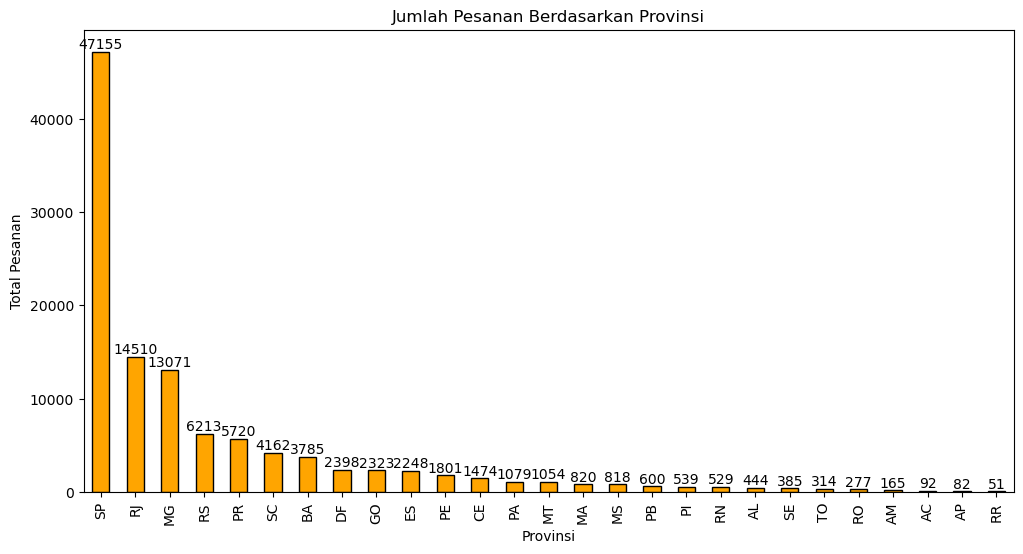

In [76]:
# Mengelompokkan data berdasarkan customer_state dan menghitung jumlah pesanan
order_count_by_state = result1_df.groupby('customer_state')['order_id'].count().sort_values(ascending=False)

# Menampilkan grafik diagram batang
plt.figure(figsize=(12, 6))
order_count_by_state.plot(kind='bar', color='orange', edgecolor='black')  # Ubah warna menjadi oranye
plt.title('Jumlah Pesanan Berdasarkan Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Total Pesanan')

# Menambahkan label pada diagram batang
for i, value in enumerate(order_count_by_state):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.show()


São Paulo menonjol sebagai wilayah dengan jumlah pemesanan terbanyak. Hal ini sesuai dengan posisinya sebagai pusat keuangan dan industri utama di Brasil. Faktor-faktor seperti keberagaman ekonomi, industri manufaktur, layanan keuangan, perdagangan, dan teknologi mungkin menjadi pendorong utama tingginya aktivitas pemesanan di wilayah ini.  

Wilayah Rio de Janeiro menempati posisi kedua dalam jumlah pemesanan. Meskipun tidak sebanyak São Paulo, RJ masih merupakan kontributor signifikan dalam hal aktivitas pemesanan. Penjelasan lebih lanjut tentang faktor-faktor ekonomi atau sosial di RJ mungkin diperlukan untuk memahami alasan di balik tingginya jumlah pemesanan.  

Setelah São Paulo dan Rio de Janeiro, wilayah-wilayah seperti Minas Gerais, Rio Grande do Sul, dan Paraná juga memiliki aktivitas pemesanan yang cukup tinggi. Faktor-faktor ekonomi dan demografi di wilayah-wilayah ini mungkin juga berperan dalam tingginya aktivitas pemesanan.  

Roraima (RR) memiliki jumlah pemesanan yang rendah, dengan populasi yang relatif kecil dan terletak di bagian utara Brasil. Hal ini dapat disebabkan oleh karakteristik ekonomi dan demografi unik di wilayah ini, seperti dominasinya sektor pertanian dan pertambangan.

#### Produk dengan kategori apa yang banyak dijual oleh seller dan dipesan oleh customer?

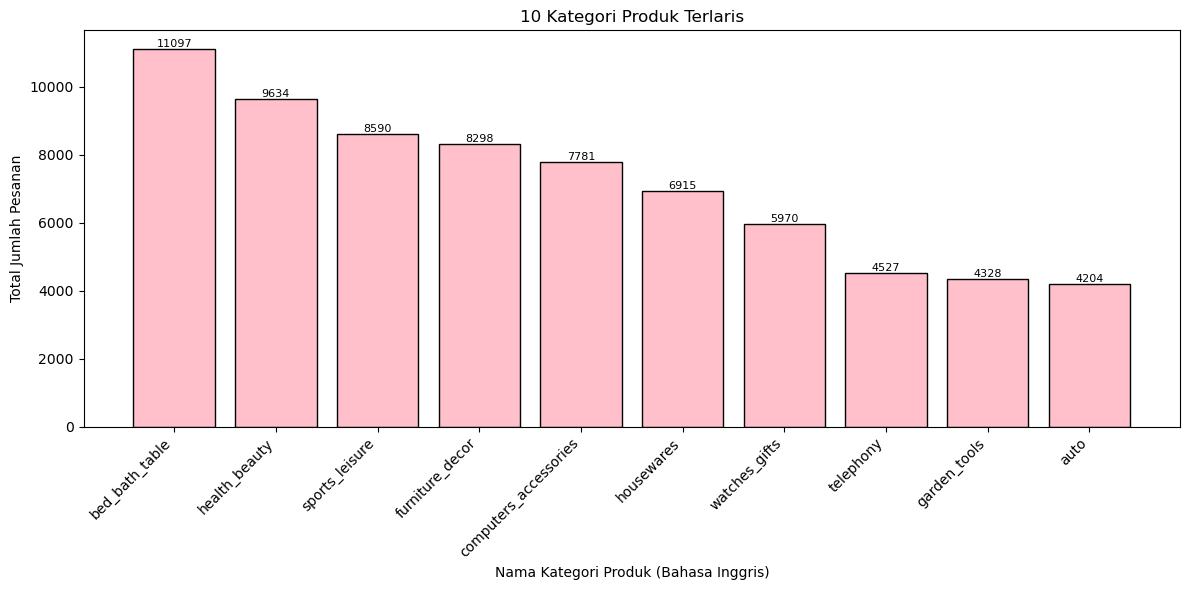

In [77]:
# Mengurutkan DataFrame berdasarkan jumlah produk secara descending dan mengambil 10 teratas
result2_df_sorted_top10 = result2_df.sort_values(by='order_id', ascending=False).head(10)

# Menampilkan grafik diagram batang
plt.figure(figsize=(12, 6))
bars = plt.bar(result2_df_sorted_top10['product_category_name_english'], result2_df_sorted_top10['order_id'], color='pink', edgecolor='black')

# Menambahkan label pada diagram
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=8)

plt.title('10 Kategori Produk Terlaris')
plt.xlabel('Nama Kategori Produk (Bahasa Inggris)')
plt.ylabel('Total Jumlah Pesanan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1. Bed & Bath Table  
Deskripsi: Produk dalam kategori ini mencakup peralatan tidur dan kebutuhan kamar mandi seperti seprai, sprei, bantal, selimut, perlengkapan kamar mandi, handuk, dan perlengkapan tidur lainnya.  
Tren: Tingginya permintaan menunjukkan bahwa pelanggan sering membeli produk ini, mungkin karena kebutuhan esensial dalam aktivitas harian.  
2. Health & Beauty  
Deskripsi: Kategori ini mencakup berbagai produk kesehatan dan kecantikan seperti produk perawatan kulit, kosmetik, alat kesehatan, dan produk perawatan tubuh.  
Tren: Kesehatan dan kecantikan selalu menjadi fokus perhatian konsumen, dan tingginya penjualan dalam kategori ini mencerminkan kebutuhan pelanggan untuk produk-produk ini.  
3. Sports & Leisure  
Deskripsi: Produk dalam kategori ini mungkin mencakup perlengkapan olahraga, peralatan luar ruangan, dan barang-barang hobi.  
Tren: Tingginya penjualan dalam kategori ini bisa berkaitan dengan minat masyarakat terhadap kegiatan olahraga dan rekreasi.  
4. Furniture & Decor  
Deskripsi: Kategori ini mencakup berbagai furnitur dan dekorasi untuk rumah, seperti kursi, meja, lampu, hiasan dinding, dan dekorasi rumah lainnya.  
Tren: Keinginan pelanggan untuk memperbarui atau menghias rumah mereka dapat menjadi penyebab tingginya penjualan dalam kategori ini.  
5. Computers & Accessories  
Deskripsi: Produk-produk dalam kategori ini mungkin mencakup komputer, laptop, aksesori komputer, dan perangkat keras terkait.  
Tren: Kategori ini mungkin diminati oleh konsumen yang mencari perangkat keras komputer atau aksesori untuk kebutuhan teknologi mereka.  
6. Housewares  
Deskripsi: Kategori ini mencakup peralatan rumah tangga seperti peralatan dapur, piring, gelas, alat makan, dan barang-barang kebutuhan sehari-hari lainnya.  
Tren: Kategori ini bisa diminati karena kebutuhan konstan untuk peralatan rumah tangga sehari-hari.  
7. Watches & Gifts  
Deskripsi: Produk dalam kategori ini mungkin mencakup jam tangan, perhiasan, dan barang-barang hadiah.  
Tren: Tingginya penjualan dalam kategori ini mungkin terkait dengan minat pelanggan terhadap aksesori pribadi dan barang-barang hadiah.  
8. Telephony  
Deskripsi: Kategori ini mencakup produk-produk telepon dan aksesori, seperti ponsel, earphone, dan perangkat telekomunikasi lainnya.  
Tren: Dalam era teknologi modern, produk telekomunikasi terus diminati oleh konsumen.  
9. Garden Tools  
Deskripsi: Produk dalam kategori ini mungkin mencakup peralatan kebun, peralatan taman, dan perlengkapan outdoor.  
Tren: Tingginya penjualan dalam kategori ini mungkin terkait dengan minat konsumen dalam kegiatan berkebun atau aktivitas outdoor.  
10. Auto  
Deskripsi: Kategori ini mencakup produk otomotif, suku cadang mobil, dan aksesori kendaraan.  
Tren: Tingginya penjualan dalam kategori ini bisa disebabkan oleh kebutuhan konsumen untuk suku cadang atau aksesori untuk kendaraan mereka.  

#### Bagaimana grafik jumlah penjualan barang per tahun?

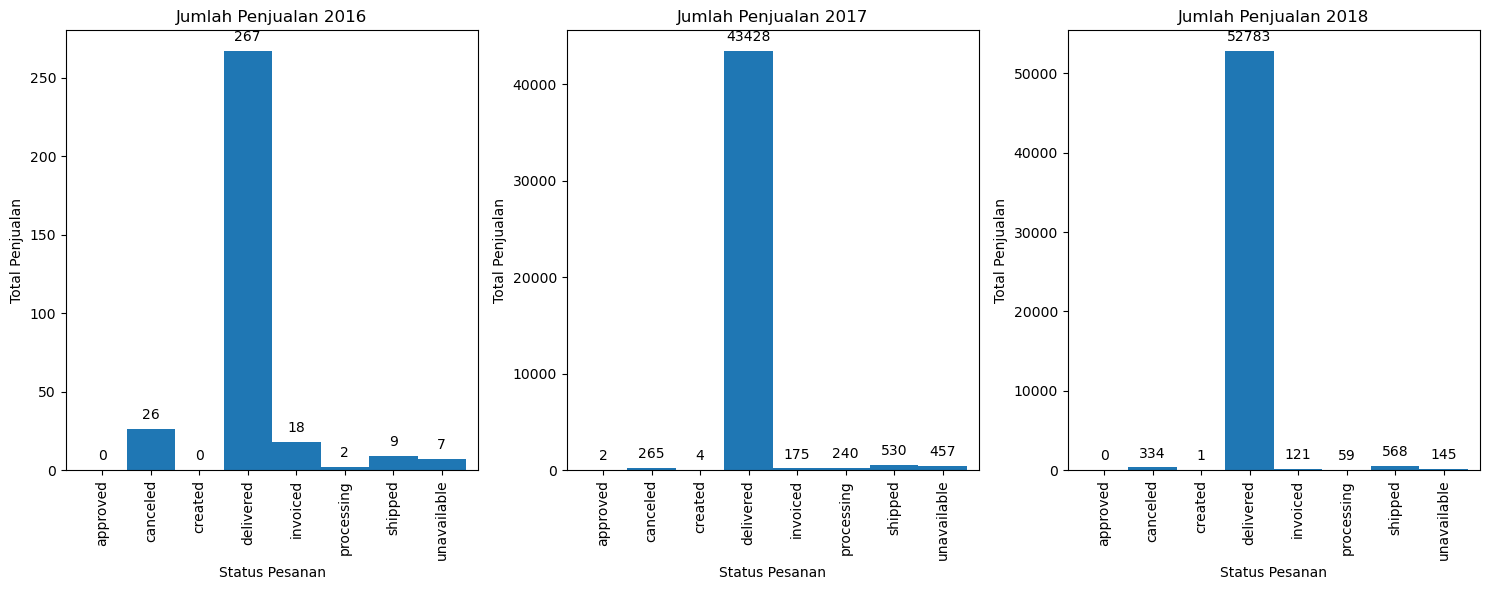

In [78]:
# Mengelompokkan data berdasarkan tahun, order_status, dan menghitung total penjualan
yearly_sales = orders_df.groupby([orders_df['order_purchase_timestamp'].dt.year, 'order_status']).size().unstack().fillna(0)

# Plot diagram batang untuk setiap tahun
years = [2016, 2017, 2018]
titles = ['Jumlah Penjualan 2016', 'Jumlah Penjualan 2017', 'Jumlah Penjualan 2018']

plt.figure(figsize=(15, 6))

for i, year in enumerate(years, start=1):
    plt.subplot(1, 3, i)
    yearly_sales.loc[year].plot(kind='bar', stacked=False, width=1)
    plt.title(titles[i-1])
    plt.xlabel('Status Pesanan')
    plt.ylabel('Total Penjualan')
    
    # Menambahkan label pada setiap batang
    for p in plt.gca().patches:
        plt.gca().annotate(f"{int(p.get_height())}", 
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

1. Tahun 2016:  
Jumlah Penjualan: Jumlah penjualan pada tahun 2016 terlihat rendah karena data aplikasi e-commerce ini dimulai pada bulan September 2016.  
Status Pesanan: Terdapat penjualan yang sebagian besar telah diselesaikan (completed), dengan sedikit jumlah pembatalan atau masalah lainnya.  
2. Tahun 2017:  
Pertumbuhan Jumlah Penjualan: Terjadi peningkatan signifikan dalam jumlah penjualan dari tahun sebelumnya.  
Status Pesanan: Mayoritas pesanan diselesaikan, dan terdapat sedikit pembatalan atau masalah lainnya.  
3. Tahun 2018:  
Pertumbuhan Stabil: Meskipun terjadi pertumbuhan, pertumbuhannya tidak sebesar dari 2016 ke 2017. Namun, jumlah penjualan tetap meningkat dari tahun ke tahun.  
Status Pesanan: Mayoritas pesanan juga diselesaikan, dengan sedikit pembatalan atau masalah lainnya.  

#### Seller mana yang aktif melakukan penjualan dan seller mana yang sering mengcancel penjualan

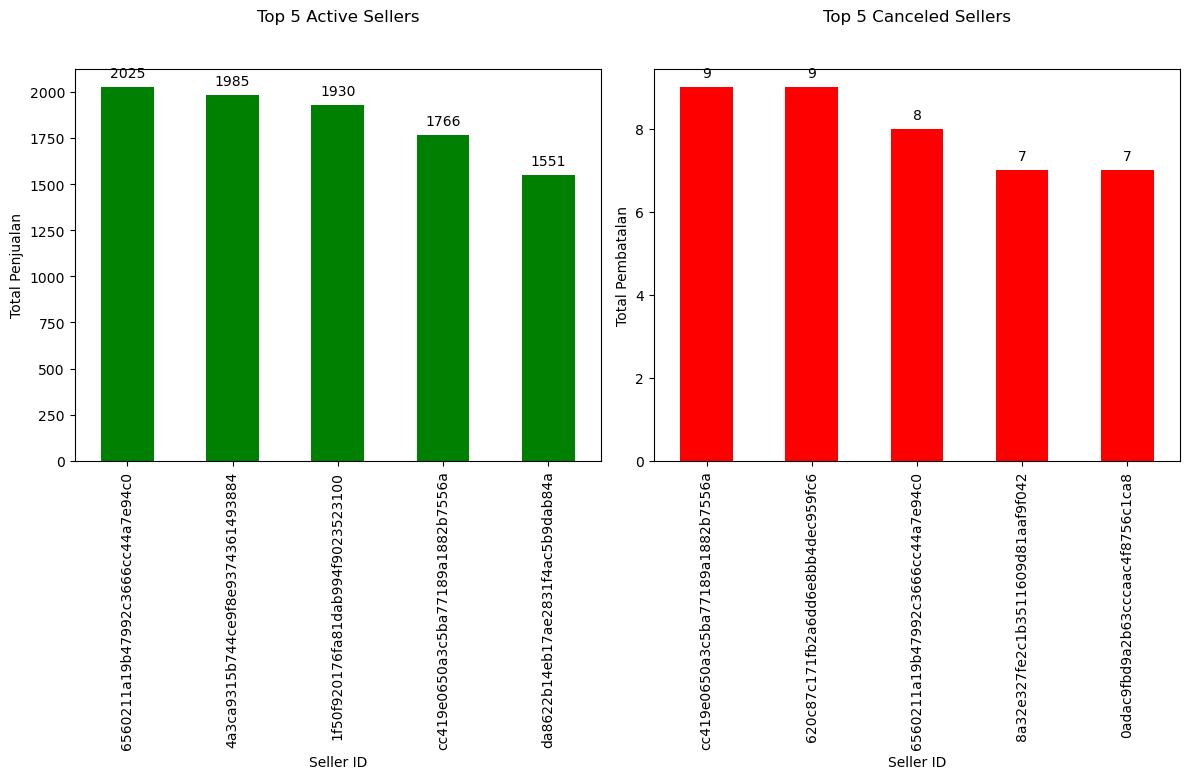

In [79]:
import textwrap

# Ambil top 5 dan bottom 5 sellers
top5_active = active_sellers_count.head(5)
bottom5_active = active_sellers_count.tail(5)

top5_canceled = canceled_sellers_count.head(5)
bottom5_canceled = canceled_sellers_count.tail(5)

# Plot diagram batang
plt.figure(figsize=(12, 12))  # Ukuran figure

# Fungsi untuk membuat plot
def create_bar_plot(data, title, color, subplot_position):
    plt.subplot(2, 2, subplot_position)
    ax = data.plot(kind='bar', color=color)
    plt.title(title, y=1.1)
    plt.xlabel('Seller ID')
    plt.ylabel('Total Penjualan' if color == 'green' else 'Total Pembatalan')
    
    # Menambahkan label pada setiap bar
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot top 5 active sellers
create_bar_plot(top5_active, 'Top 5 Active Sellers', 'green', 1)

# Plot top 5 canceled sellers
create_bar_plot(top5_canceled, 'Top 5 Canceled Sellers', 'red', 2)

plt.tight_layout()
plt.show()

Diagram ini memberikan wawasan tentang perilaku penjualan dan pembatalan dari top 5 seller.
Top 5 Active Sellers memiliki dampak signifikan pada total penjualan, sementara Top 5 Canceled Sellers menunjukkan bahwa beberapa seller mungkin mengalami masalah dengan ketersediaan produk atau proses penjualan yang dapat mempengaruhi kepuasan pelanggan.

#### Bagaimana jumlah score review untuk setiap produk?

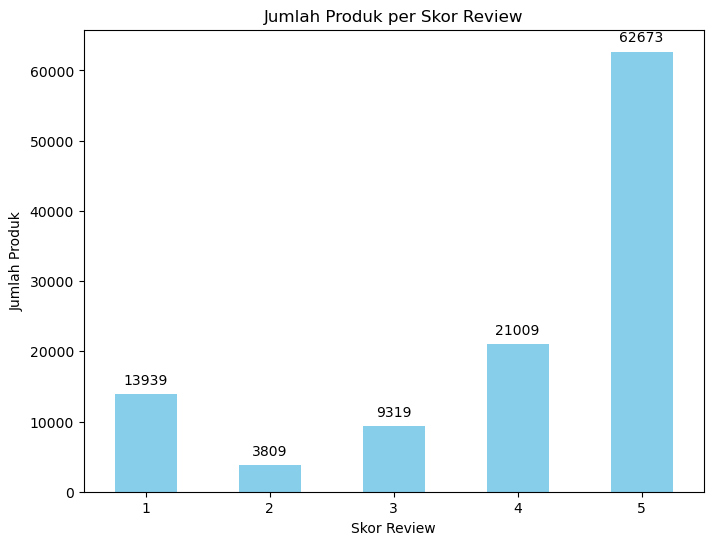

In [80]:
# Menghitung jumlah produk untuk setiap skor review
review_counts = merged5star_df['review_score'].value_counts().sort_index()

# Plot diagram batang
plt.figure(figsize=(8, 6))
ax = review_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Produk per Skor Review')
plt.xlabel('Skor Review')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=0)  # Agar label sumbu x tidak miring

# Menambahkan label pada setiap bar
for bar in ax.patches:
    ax.annotate(str(int(bar.get_height())), 
                (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.show()

1. Produk dengan Rating 5 :  
Jumlah Produk: 62,673  
Interpretasi: Produk dengan rating bintang 5 mendominasi dengan jumlah yang luar biasa. Ini mencerminkan kepuasan pelanggan yang tinggi terhadap produk tersebut.  
2. Produk dengan Rating 4 :  
Jumlah Produk: 21,009  
Interpretasi: Produk dengan rating bintang 4 menduduki posisi kedua, menunjukkan bahwa sejumlah besar produk juga mendapatkan rating yang sangat baik.  
3. Produk dengan Rating 3 :  
Jumlah Produk: 9,319  
Interpretasi: Meskipun lebih rendah dari bintang 4, produk dengan rating bintang 3 masih memiliki jumlah yang signifikan. Ini dapat menunjukkan variasi dalam pengalaman pelanggan.  
4. Produk dengan Rating 2 :  
Jumlah Produk: 3,809  
Interpretasi: Jumlah produk dengan rating bintang 2 lebih rendah, yang mungkin menunjukkan adanya beberapa isu atau kekurangan dalam produk tersebut.  
5. Produk dengan Rating 1 :  
Jumlah Produk: 13,939  
Interpretasi: Produk dengan rating bintang 1 memiliki jumlah yang cukup signifikan, menunjukkan adanya sejumlah produk yang mungkin tidak memenuhi ekspektasi pelanggan.  

#### Berapa jumlah pelanggan yang pernah melakukan pemesanan dan yang belum pernah melakukan pemesanan?

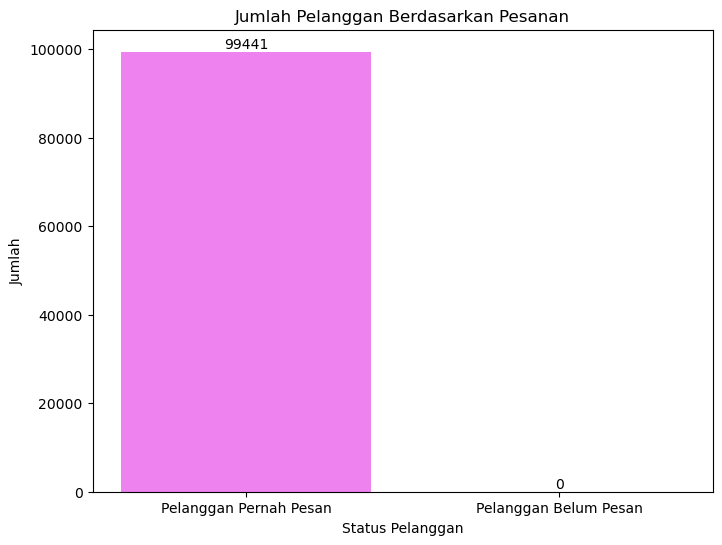

In [81]:
# Data untuk diagram batang
labels = ["Pelanggan Pernah Pesan", "Pelanggan Belum Pesan"]
values = [customers_with_orders, customers_without_orders]

# Plot diagram batang
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['violet', 'yellow'])
plt.title('Jumlah Pelanggan Berdasarkan Pesanan')
plt.xlabel('Status Pelanggan')
plt.ylabel('Jumlah')

# Menambahkan label pada setiap bar
for idx, value in enumerate(values):
    plt.text(idx, value, str(value), ha='center', va='bottom')

plt.show()

Pelanggan yang Pernah Pesan:  
Jumlah Pelanggan: 99,441  
Interpretasi: Seluruh basis pelanggan, yang mencapai 99,441, telah aktif melakukan pemesanan. Ini mencerminkan tingkat keterlibatan yang sangat tinggi dari pelanggan, menunjukkan bahwa semua pelanggan telah menikmati pengalaman berbelanja.  
Pelanggan yang Belum Pernah Pesan:  
Jumlah Pelanggan: 0  
Interpretasi: Data menunjukkan bahwa tidak ada satu pun pelanggan yang belum melakukan pemesanan. Semua pelanggan telah terlibat dalam aktivitas berbelanja. Ini bisa dianggap sebagai pencapaian positif, menandakan bahwa e-commerce ini berhasil menarik seluruh basis pelanggan untuk bertransaksi.  

#### Bagaimana skoring RFM pelanggan berdasarkan data pemesanan?

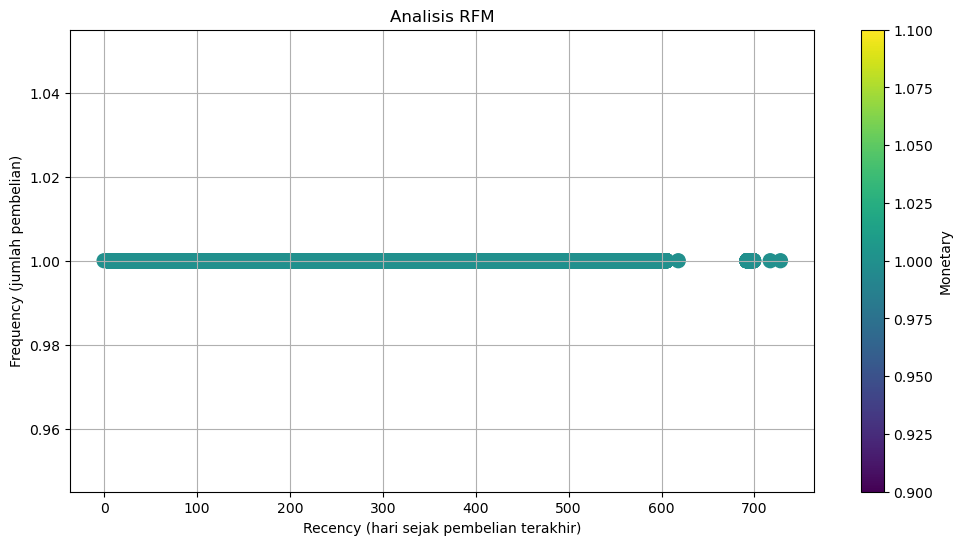

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Mengonversi 'order_purchase_timestamp' ke tipe datetime
orders2_df['order_purchase_timestamp'] = pd.to_datetime(orders2_df['order_purchase_timestamp'])

# Menentukan tanggal terakhir yang tersedia dalam data
tanggal_terakhir_pembelian = orders2_df['order_purchase_timestamp'].max()

# Menghitung Recency
recency = (tanggal_terakhir_pembelian - orders2_df['order_purchase_timestamp']).dt.days
orders2_df['recency'] = recency

# Menghitung Frequency
frequency = orders2_df.groupby('customer_id')['order_id'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']

# Menghitung Monetary
monetary = orders2_df.groupby('customer_id')['order_id'].count().reset_index()
monetary.columns = ['customer_id', 'monetary']

# Menggabungkan data RFM
rfm_df = pd.merge(frequency, monetary, on='customer_id')
rfm_df['recency'] = recency

# Visualisasi RFM
plt.figure(figsize=(12, 6))
plt.scatter(rfm_df['recency'], rfm_df['frequency'], c=rfm_df['monetary'], cmap='viridis', s=100)
plt.colorbar(label='Monetary')
plt.title('Analisis RFM')
plt.xlabel('Recency (hari sejak pembelian terakhir)')
plt.ylabel('Frequency (jumlah pembelian)')
plt.grid()
plt.show()

- **Frekuensi:** Semua titik data berada di sekitar nilai frekuensi 1, yang berarti hampir seluruh pelanggan hanya melakukan satu kali pembelian.  
  Interpretasi: Distribusi frekuensi menunjukkan bahwa mayoritas pelanggan melakukan satu kali pembelian. Ini mengindikasikan bahwa meskipun basis pelanggan besar, tingkat pembelian berulang sangat rendah. Peluang besar bagi bisnis adalah menciptakan strategi yang dapat mendorong pembelian ulang atau meningkatkan keterlibatan pelanggan pasca transaksi pertama.

**Recency dan Monetary:**
- **Recency:** Sebagian besar pelanggan terakhir melakukan pembelian antara 0 hingga sekitar 700 hari yang lalu, dengan distribusi yang tersebar hingga sekitar 750 hari.
- **Monetary:** Warna yang seragam menunjukkan bahwa hampir semua pelanggan berada dalam rentang pengeluaran yang sama, di sekitar nilai 1 pada skala monetary. Hal ini mengindikasikan homogenitas dalam nilai pembelanjaan di seluruh basis pelanggan.


#### Bagaimana rata-rata skor ulasan untuk setiap produk?

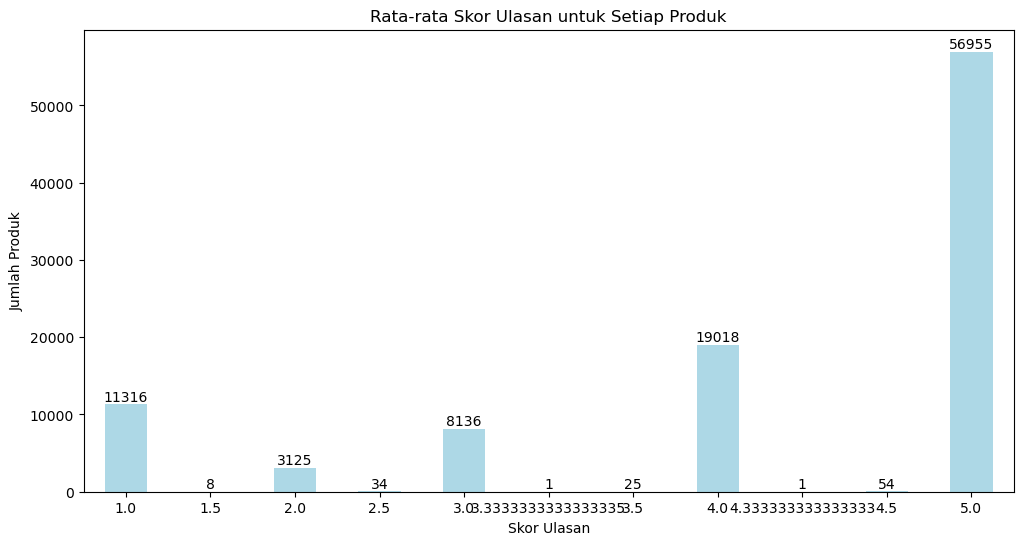

In [83]:
# Menghitung rata-rata skor ulasan per produk
average_reviews = order_reviews_df.groupby('order_id')['review_score'].mean().reset_index()

# Menghitung frekuensi masing-masing skor ulasan
review_counts = average_reviews['review_score'].value_counts().sort_index()

# Visualisasi
plt.figure(figsize=(12, 6))
bars = review_counts.plot(kind='bar', color='lightblue')
plt.title('Rata-rata Skor Ulasan untuk Setiap Produk')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=0)

# Menambahkan label jumlah pada setiap batang
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),  # Menggunakan int untuk menghindari desimal
        ha='center',
        va='bottom'
    )

plt.show()

Rata-rata skor ulasan menunjukkan bahwa pelanggan memberikan umpan balik yang positif terhadap produk yang ditawarkan. Dengan banyaknya produk yang dinilai, dapat dilihat bahwa sebagian besar pelanggan merasa puas dengan pengalaman mereka. 

- **Skor 5.0**:   
  Interpretasi: Dengan jumlah produk tertinggi mencapai 56,955, ini mencerminkan tingkat kepuasan pelanggan yang sangat baik. Produk-produk ini mendapatkan ulasan yang sangat positif, menunjukkan bahwa pelanggan merasa produk memenuhi atau bahkan melampaui harapan mereka.
  
- **Skor 4.0**:  
  Interpretasi: Sebanyak 19,018 produk mendapatkan skor ini, menunjukkan bahwa meskipun ada kepuasan, masih terdapat area yang dapat ditingkatkan. Pelanggan merasa produk ini baik, tetapi mungkin ada beberapa aspek yang tidak sepenuhnya memuaskan.

- **Skor 3.5**:  
  Interpretasi: Dengan 8,136 produk yang mendapatkan skor ini, ini menunjukkan bahwa produk-produk tersebut berada di batas kepuasan. Meskipun masih dianggap baik, ada kemungkinan bahwa pelanggan memiliki harapan yang lebih tinggi.

- **Skor di Bawah 3.0**:  
  Interpretasi: Sangat sedikit produk yang mendapatkan skor ini, menunjukkan bahwa sebagian besar produk berada dalam kategori yang baik. Ini adalah sinyal positif, tetapi juga menunjukkan bahwa ada produk yang perlu diperbaiki.

Secara keseluruhan, analisis rata-rata skor ulasan menunjukkan bahwa pelanggan sangat puas dengan produk yang ditawarkan. Meskipun sebagian besar produk mendapat skor tinggi, penting untuk memperhatikan umpan balik untuk produk dengan skor menengah dan rendah guna meningkatkan kualitas dan kepuasan pelanggan di masa depan.

#### Bagaimana pelanggan dikelompokkan berdasarkan frekuensi pembelian mereka?

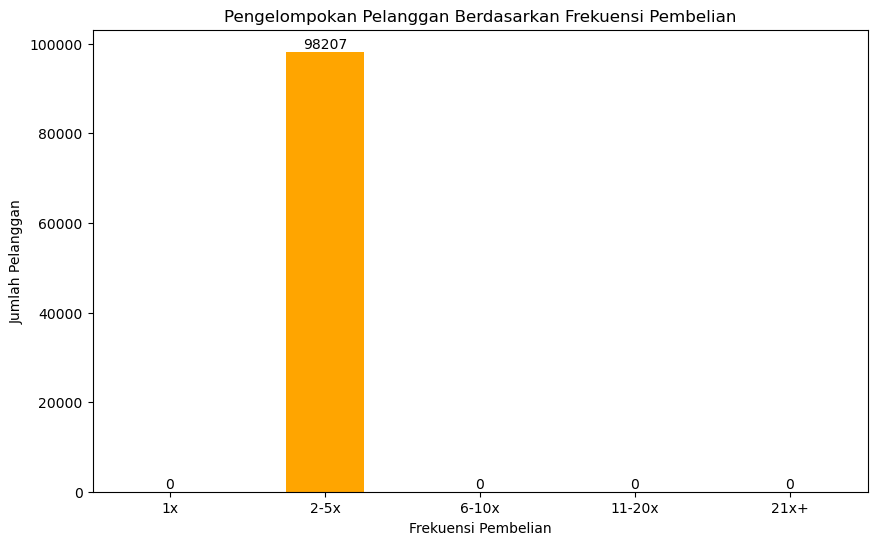

In [84]:
# Menghitung frekuensi pembelian
frequency = orders2_df['customer_id'].value_counts().reset_index()
frequency.columns = ['customer_id', 'frequency']

# Binning frekuensi
max_frequency = frequency['frequency'].max()  # Mendapatkan frekuensi maksimum

# Mendefinisikan bins secara manual
bins = [0, 1, 5, 10, 20, max_frequency + 1]  # Menambahkan 1 untuk interval terakhir terbuka
labels = ['1x', '2-5x', '6-10x', '11-20x', '21x+']

# Menghapus nilai duplikat (jika ada)
bins = sorted(set(bins))  # Pastikan bins terurut dan tidak ada nilai duplikat

# Mengelompokkan frekuensi ke dalam kategori
frequency['frequency_group'] = pd.cut(frequency['frequency'], bins=bins, labels=labels, right=False)

# Visualisasi
plt.figure(figsize=(10, 6))
frequency_counts = frequency['frequency_group'].value_counts().sort_index()
bars = frequency_counts.plot(kind='bar', color='orange')  # Mengurutkan berdasarkan index
plt.title('Pengelompokan Pelanggan Berdasarkan Frekuensi Pembelian')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)

# Menambahkan label jumlah pada setiap batang
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),  # Menggunakan int untuk menghindari desimal
        ha='center',
        va='bottom'
    )

plt.show()

- **Mayoritas Pelanggan dengan Frekuensi 2-5x:** Grafik menunjukkan bahwa seluruh basis pelanggan melakukan pembelian di kisaran 2 hingga 5 kali, tanpa ada pelanggan di kategori lain (lebih dari 5 pembelian atau hanya satu kali). Ini mengindikasikan bahwa pelanggan cukup aktif dengan melakukan pembelian lebih dari satu kali, namun tidak ada yang mencapai tingkat pembelian berulang yang lebih tinggi.
  
- **Tidak Ada Pelanggan di Frekuensi Lain:** Fakta bahwa tidak ada pelanggan yang hanya melakukan satu pembelian atau melakukan lebih dari lima pembelian menunjukkan pola yang sangat terfokus di antara frekuensi pembelian 2-5x. Ini bisa jadi menunjukkan efektivitas dalam mendorong pelanggan untuk kembali berbelanja, namun kurangnya pembelian berulang di frekuensi yang lebih tinggi.

#### Di mana pelanggan berada berdasarkan lokasi geografis?

C:\Users\HP OMEN ID\AppData\Local\Temp\ipykernel_14104\4293137711.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


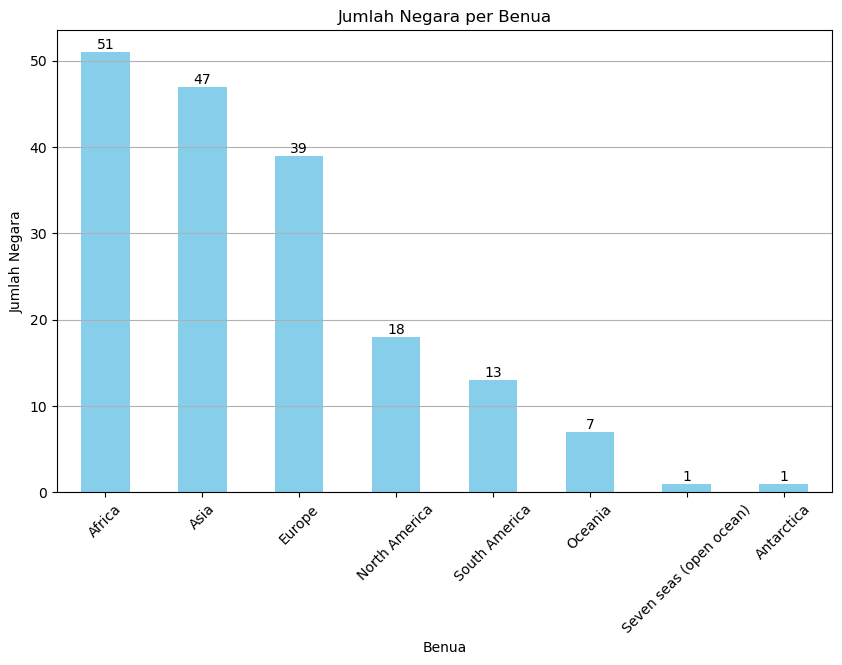

<Figure size 1500x1000 with 0 Axes>

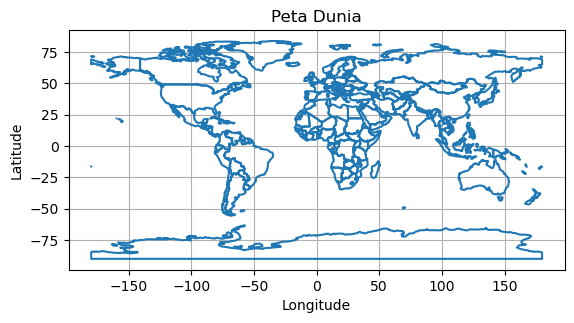

In [85]:
# Membaca dataset bawaan GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Menampilkan informasi dasar dari data
print(world.head())

# Menghitung jumlah negara berdasarkan benua
continent_counts = world['continent'].value_counts()

# Visualisasi jumlah negara per benua
plt.figure(figsize=(10, 6))
continent_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Negara per Benua')
plt.xlabel('Benua')
plt.ylabel('Jumlah Negara')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Menambahkan label pada setiap bar
for index, value in enumerate(continent_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

# Visualisasi peta dunia
plt.figure(figsize=(15, 10))
world.boundary.plot()
plt.title('Peta Dunia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

Pelanggan tersebar di seluruh dunia berdasarkan jumlah negara per benua. **Afrika** memiliki pelanggan terbanyak dengan 51 negara, diikuti oleh **Asia** (47 negara), dan **Eropa** (39 negara). **Amerika Utara** dan **Amerika Selatan** masing-masing memiliki pelanggan dari 18 dan 13 negara. **Oceania** memiliki lebih sedikit negara (7), sementara **Antartika** dan **Lautan Terbuka** masing-masing hanya menyumbang 1 wilayah. Peta dunia memberikan gambaran visual lokasi geografis pelanggan di seluruh benua, dengan konsentrasi terbesar di Afrika, Asia, dan Eropa.

#### Apa metode pembayaran yang paling umum digunakan oleh pelanggan?

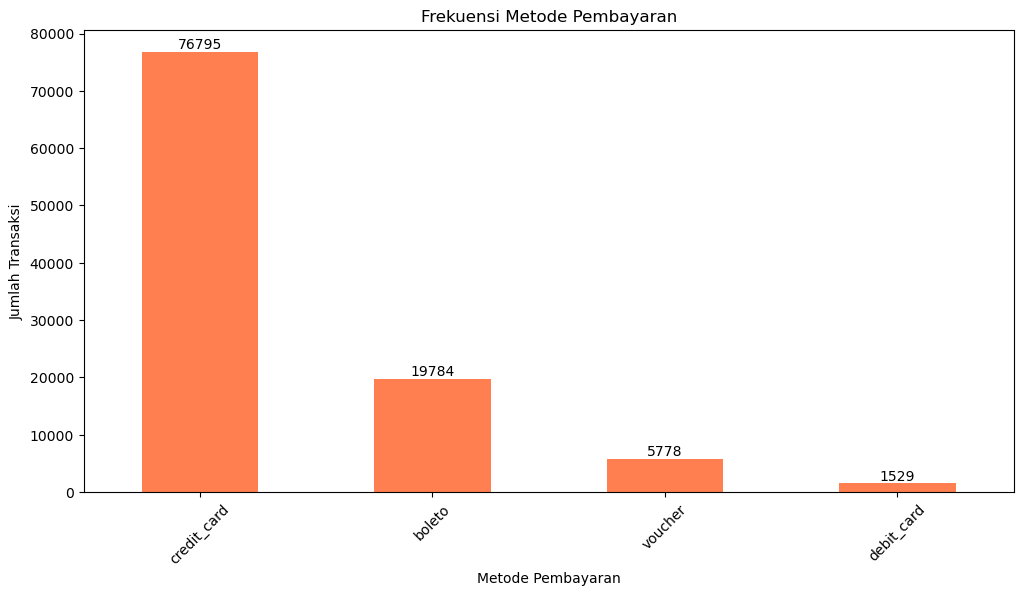

In [86]:
# Menghitung frekuensi metode pembayaran
payment_methods = order_payments_df['payment_type'].value_counts()

# Visualisasi
plt.figure(figsize=(12, 6))
bars = payment_methods.plot(kind='bar', color='coral')
plt.title('Frekuensi Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)

# Menambahkan label jumlah pada setiap batang
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),  # Menggunakan int untuk menghindari desimal
        ha='center',
        va='bottom'
    )

plt.show()

- **Credit Card:** Metode pembayaran yang paling sering digunakan, dengan **76,795 transaksi**. Ini menunjukkan dominasi penggunaan kartu kredit dalam transaksi pelanggan.
- **Boleto:** Sebanyak **19,784 transaksi** dilakukan menggunakan metode pembayaran boleto, menjadi metode pembayaran kedua yang paling umum digunakan.
- **Voucher:** Terdapat **5,778 transaksi** yang dilakukan dengan voucher, menjadikannya metode pembayaran yang jauh lebih sedikit digunakan dibandingkan kartu kredit dan boleto.
- **Debit Card:** Hanya **1,529 transaksi** dilakukan menggunakan kartu debit, menjadikannya metode pembayaran yang paling sedikit digunakan.

Untuk meningkatkan variasi dalam metode pembayaran yang digunakan, bisnis dapat memberikan insentif bagi pelanggan yang menggunakan voucher atau kartu debit, atau mengedukasi lebih banyak pelanggan mengenai keuntungan menggunakan metode pembayaran yang lebih jarang digunakan.

# Conclusion

**Kesimpulan Keseluruhan:**  
  Dalam melakukan analisis terhadap data e-commerce ini, kita dapat menarik beberapa kesimpulan yang memberikan wawasan mendalam tentang kinerja bisnis dan perilaku pelanggan. Kategori produk seperti "Bed & Bath Table," "Health & Beauty," dan "Computers & Accessories" menonjol sebagai pilihan favorit pelanggan, mencerminkan kebutuhan esensial dan minat dalam teknologi. Analisis tren penjualan menunjukkan pertumbuhan yang signifikan pada tahun 2017, diikuti oleh pertumbuhan yang stabil pada tahun 2018. Selain itu, fakta bahwa seluruh basis pelanggan telah aktif berbelanja adalah indikator positif dari tingkat keterlibatan yang tinggi.Mayoritas pelanggan melakukan pembelian hanya satu kali, yang menunjukkan rendahnya tingkat pembelian berulang. Dengan mengidentifikasi peluang untuk meningkatkan keterlibatan pelanggan pasca transaksi pertama, bisnis dapat merancang strategi yang lebih efektif untuk mendorong pembelian ulang. Rata-rata skor ulasan menunjukkan bahwa pelanggan memberikan umpan balik yang positif terhadap produk yang ditawarkan, dengan jumlah produk tertinggi mencapai skor 5.0 sebanyak 56,955 produk. Namun, meskipun sebagian besar produk mendapatkan skor tinggi, penting untuk memperhatikan umpan balik untuk produk dengan skor menengah dan rendah guna meningkatkan kualitas dan kepuasan pelanggan di masa depan.  Pelanggan tersebar di seluruh dunia, dengan konsentrasi terbanyak di Afrika, Asia, dan Eropa. Berkenaan dengan metode pembayaran, kartu kredit menjadi yang paling dominan dengan 76,795 transaksi, diikuti oleh boleto dan voucher. Untuk meningkatkan variasi dalam metode pembayaran, bisnis perlu memberikan insentif bagi pelanggan yang menggunakan metode pembayaran yang lebih jarang digunakan. Penting untuk diingat bahwa evaluasi seller menjadi elemen kunci dalam rantai nilai e-commerce. Top 5 Active Sellers memiliki dampak positif pada penjualan secara keseluruhan, sementara Top 5 Canceled Sellers menunjukkan adanya kendala yang perlu diperhatikan. Keterlibatan aktif dengan seller, pengelolaan stok yang efisien, dan pemahaman mendalam terhadap preferensi pelanggan dapat membantu memperbaiki kelemahan yang terdeteksi. Namun, tingginya skor review produk secara keseluruhan adalah indikator positif. Meskipun mayoritas produk mendapatkan rating tinggi, perhatian khusus perlu diberikan pada produk dengan rating bintang 1. Ini menunjukkan pentingnya fokus pada peningkatan kualitas produk, pelayanan pelanggan, dan manajemen seller.

**Saran untuk Kedepannya:**

1. **Peningkatan Kualitas dan Pelayanan Pelanggan:**
   - Fokus pada peningkatan kualitas produk, terutama untuk produk dengan rating rendah.
   - Terus pantau umpan balik pelanggan untuk mengidentifikasi area peningkatan potensial.
   - Perkuat layanan pelanggan untuk meningkatkan kepuasan pelanggan.

2. **Diversifikasi dan Manajemen Stok:**
   - Diversifikasi produk untuk mengakomodasi berbagai kebutuhan pelanggan.
   - Optimalkan manajemen stok untuk menghindari kehabisan produk yang diminati.

3. **Strategi Pemasaran yang Terfokus:**
   - Analisis lebih lanjut tren penjualan untuk merancang strategi pemasaran yang lebih terfokus.
   - Terlibat dengan seller untuk meningkatkan ketersediaan dan variasi produk.

4. **Pemantauan dan Respons Terhadap Ulasan Pelanggan:**
   - Terus pantau ulasan pelanggan dan responsif terhadap umpan balik.
   - Gunakan ulasan pelanggan sebagai dasar untuk perbaikan berkelanjutan.

5. **Optimalkan Platform Teknologi:**
   - Lakukan pembaruan dan optimasi rutin pada platform teknologi e-commerce.
   - Pastikan pengalaman belanja online yang memuaskan untuk pelanggan.

### Unduh Data

In [88]:
merged_df = (orders2_df
              .merge(cust_df, on='customer_id', how='left')
              .merge(order_items_df, on='order_id', how='left')
              .merge(order_payments_df, on='order_id', how='left')
              .merge(order_reviews_df, on='order_id', how='left')
              .merge(products_df, on='product_id', how='left')
              .merge(product_category_df, left_on='product_category_name', right_on='product_category_name', how='left')
              .merge(sellers_df, on='seller_id', how='left')
              .merge(geo_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left'))

# Menyimpan hasil gabungan ke dalam file CSV
merged_df.to_csv('ecommerce.csv', index=False)

print("Data berhasil digabung dan disimpan ke ecommerce.csv")

Data berhasil digabung dan disimpan ke ecommerce.csv


In [89]:
from IPython.display import FileLink

# Buat tautan untuk mengunduh file
FileLink('ecommerce.csv') # data tidak bisa diupload ke dicoding karena ukurannya 7 gb, untuk dashboard menggunakan data cleaning yang dipisah-pisahkan

C:\Users\HP OMEN ID\latihan\project\customer\ecommerce.csv

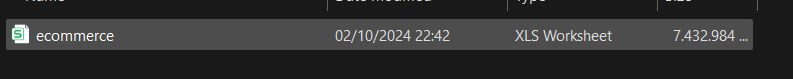